In [1]:
import numpy as np
from music21 import *

us = environment.UserSettings()
#us['musescoreDirectPNGPath'] = '/usr/bin/mscore3'
#us['musicxmlPath'] = '/usr/bin/mscore3'

In [2]:
def parse(file):
        with open(file) as f:
            count = 1
            for line in f.readlines():
                if count == 5:
                    txt = line
                count += 1
        x = txt.split()
        note_number = []
        for i in x:
            if (i[:6]) == 'chosen':
                note_number.append(i[11:])
        note_number_rem = []
        # Remove last bracket
        for i in note_number:
            note_number_rem.append(i[:len(i)-1])
        note_dict = {}
        for i in note_number_rem:
            split = i.split(',')
            note_dict[int(split[1])] = split[0]
        note_dict_sort = {}
        for key in sorted(note_dict.keys()) :
            note_dict_sort[key] = int(note_dict[key])
        return(note_dict_sort)
            
def to_stream(dic, clef, num):
        stream1 = stream.Part([clef])
        for key in dic:
            z = dic[key]
            if z == 1:
                stream1.append(note.Note('c' + num))
            if z == 2:
                stream1.append(note.Note('c#' + num))
            if z == 3:
                stream1.append(note.Note('d' + num))
            if z == 4:
                stream1.append(note.Note('eb' + num))
            if z == 5:
                stream1.append(note.Note('e' + num))
            if z == 6:
                stream1.append(note.Note('f' + num))
            if z == 7:
                stream1.append(note.Note('f#' + num))
            if z == 8:
                stream1.append(note.Note('g' + num))
            if z == 9:
                stream1.append(note.Note('ab' + num))
            if z == 10:
                stream1.append(note.Note('a' + num))
            if z == 11:
                stream1.append(note.Note('bb' + num))
            if z == 12:
                stream1.append(note.Note('b' + num))
        return(stream1)
        
        

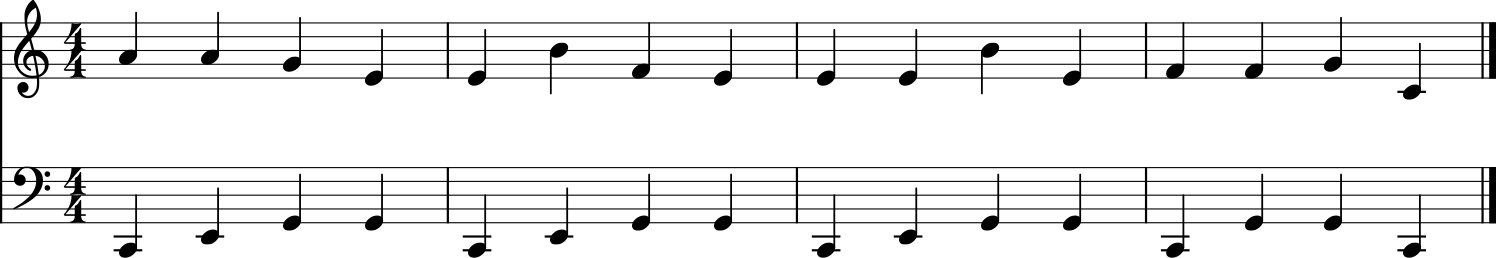

'composition.mid'

In [3]:
s = stream.Stream()
bass_clef = clef.BassClef()
treble_clef = clef.TrebleClef()
bass = to_stream(parse('bass'), bass_clef, '2') 
guitar = to_stream(parse('guitar'), treble_clef, '4' )
s.insert(guitar)
s.insert(bass)
s.show('midi')
s.show()
s.write('midi', 'composition.mid')